In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

import seaborn as sns ## This is the module for creating and manipulating DataFrames

import plotly.express as px
import plotly.figure_factory as ff
DS = pd.read_csv("DataScience.csv")


In [32]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [20]:
AB=DS.copy()

AB.head()

,Unnamed: 0,PSEEN_END_DATE,CCG_CODE,CCG_ONS_CODE,CCG_NAME,PATIENT_TYPE,AGE_BAND,PATIENTS_SEEN,POPULATION,DENTIST_AGE_GROUP,NUMBER_OF_DENTIST,AVG_IMD_SCORE
0,0,28/02/2019,00C,E38000042,NHS Darlington CCG,Adult,18+,48004,83871.0,35-44,27.0,25.657
1,1,28/02/2019,00C,E38000042,NHS Darlington CCG,Adult,18+,48004,83871.0,45-54,13.0,25.657
2,2,28/02/2019,00C,E38000042,NHS Darlington CCG,Adult,18+,48004,83871.0,55+,6.0,25.657
3,3,28/02/2019,00C,E38000042,NHS Darlington CCG,Adult,18+,48004,83871.0,Under 35,28.0,25.657
4,4,28/02/2019,00C,E38000042,NHS Darlington CCG,Child,0,42,1114.0,35-44,27.0,25.657


In [21]:
df = AB[AB['PSEEN_END_DATE']=="30/09/2018"]
age_band = df.groupby('AGE_BAND').sum()
age_band.index

Index(['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18+', '2',
       '3', '4', '5', '6', '7', '8', '9'],
      dtype='object', name='AGE_BAND')

In [421]:
age_band['Percentage']=(age_band['PATIENTS_SEEN']/age_band['PATIENTS_SEEN'].sum())*100
age_band


,Unnamed: 0,PATIENTS_SEEN,POPULATION,NUMBER_OF_DENTIST,AVG_IMD_SCORE,Percentage
AGE_BAND,,,,,,
0,66265525,82984,2526744.0,32106.0,16577.128,0.074093
1,66268556,596445,2607712.0,32106.0,16577.128,0.532543
10,66271587,1870621,2573556.0,32106.0,16577.128,1.670205
11,66274618,1805684,2521396.0,32106.0,16577.128,1.612225
12,66277649,1763557,2415828.0,32106.0,16577.128,1.574611
13,66280680,1716984,2376188.0,32106.0,16577.128,1.533028
14,66283711,1665059,2307624.0,32106.0,16577.128,1.486666
15,66286742,1574301,2269524.0,32106.0,16577.128,1.405632
16,66289773,1439842,2331992.0,32106.0,16577.128,1.285579


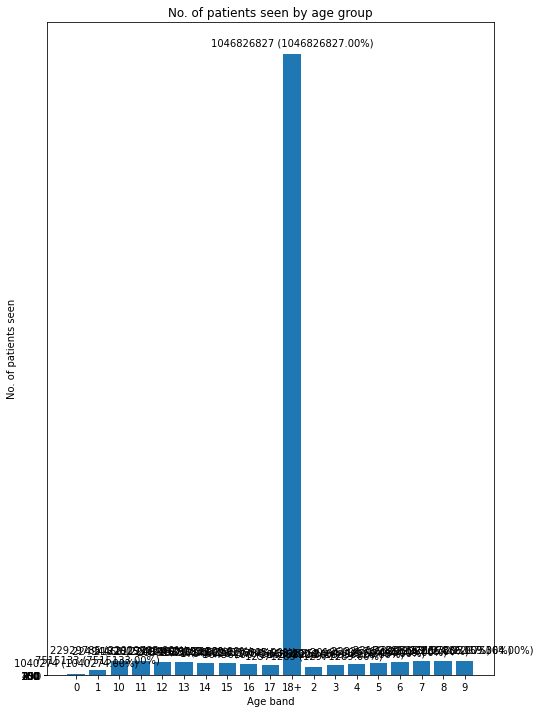

In [101]:
plt.figure(figsize = (8,12))
gen_bar = plt.bar(age_band.index, age_band['PATIENTS_SEEN'])
plt.yticks(np.arange(0,450,50))
plt.bar_label(gen_bar, labels = ['{} ({:.2f}%)'.format(t,p) for t,p in zip(age_band['PATIENTS_SEEN'],age_band['PATIENTS_SEEN'])], padding = 6)
plt.xlabel('Age band')
plt.ylabel('No. of patients seen')
plt.title('No. of patients seen by age group')
plt.show()

In [128]:
age_cat = AB.groupby('PATIENT_TYPE',as_index = False)['PATIENTS_SEEN'].count()
age_cat['Percentage']=(age_cat['PATIENTS_SEEN']/age_cat['PATIENTS_SEEN'].sum())*100
age_cat

,PATIENT_TYPE,PATIENTS_SEEN,Percentage
0,Adult,9174,5.263158
1,Child,165132,94.736842


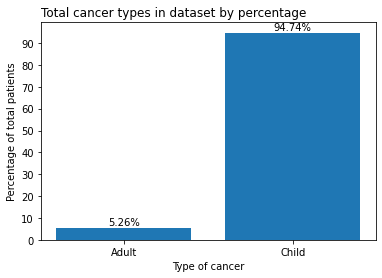

In [132]:
totals_bar = plt.bar(age_cat['PATIENT_TYPE'],age_cat['Percentage'])
plt.xticks(rotation = 0)
plt.yticks(np.arange(0,100,10))
plt.xlabel('Type of cancer')
plt.ylabel('Percentage of total patients')
plt.title('Total cancer types in dataset by percentage',loc='left')
plt.bar_label(totals_bar, labels = ['{:.2f}%'.format(t) for t in totals_bar.datavalues], padding = 1)
plt.show()

In [163]:
ccg_cat = AB.groupby('CCG_NAME',as_index = False)['PATIENTS_SEEN'].sum()
ccg_cat['Percentage']=(ccg_cat['PATIENTS_SEEN']/ccg_cat['PATIENTS_SEEN'].sum())*100
ccg_cat
#for i in ccg_cat['PATIENTS_SEEN']:
#    print(i/4)

,CCG_NAME,PATIENTS_SEEN,Percentage
0,"NHS Airedale, Wharfedale and Craven CCG",3994820,0.289964
1,NHS Ashford CCG,3113724,0.226009
2,NHS Barking and Dagenham CCG,5186728,0.376478
3,NHS Barnet CCG,7035836,0.510696
4,NHS Barnsley CCG,7327672,0.531879
...,...,...,...
187,NHS Wiltshire CCG,10608080,0.769987
188,NHS Wirral CCG,9428720,0.684383
189,NHS Wolverhampton CCG,6603120,0.479287
190,NHS Wyre Forest CCG,2375540,0.172428


In [179]:
df= AB[["PSEEN_END_DATE","CCG_CODE","CCG_ONS_CODE","CCG_NAME","PATIENT_TYPE","AGE_BAND","PATIENTS_SEEN","POPULATION","AVG_IMD_SCORE"]]
df=df.drop_duplicates()
df

,PSEEN_END_DATE,CCG_CODE,CCG_ONS_CODE,CCG_NAME,PATIENT_TYPE,AGE_BAND,PATIENTS_SEEN,POPULATION,AVG_IMD_SCORE
0,28/02/2019,00C,E38000042,NHS Darlington CCG,Adult,18+,48004,83871.0,25.657
4,28/02/2019,00C,E38000042,NHS Darlington CCG,Child,0,42,1114.0,25.657
8,28/02/2019,00C,E38000042,NHS Darlington CCG,Child,1,398,1212.0,25.657
12,28/02/2019,00C,E38000042,NHS Darlington CCG,Child,10,1022,1269.0,25.657
16,28/02/2019,00C,E38000042,NHS Darlington CCG,Child,11,927,1328.0,25.657
...,...,...,...,...,...,...,...,...,...
174301,31/08/2018,99Q,Unallocated,Unallocated,Child,5,2055,0.0,NaN
174302,31/08/2018,99Q,Unallocated,Unallocated,Child,6,2233,0.0,NaN
174303,31/08/2018,99Q,Unallocated,Unallocated,Child,7,2316,0.0,NaN
174304,31/08/2018,99Q,Unallocated,Unallocated,Child,8,2315,0.0,NaN


In [180]:
age_band = df.groupby('AGE_BAND').sum()
age_band['Percentage']=(age_band['PATIENTS_SEEN']/age_band['PATIENTS_SEEN'].sum())*100
age_band

,PATIENTS_SEEN,POPULATION,AVG_IMD_SCORE,Percentage
AGE_BAND,,,,
0,261951,7776261.0,50096.829,0.075307
1,1893541,8029047.0,50096.829,0.544365
10,5785280,7940529.0,50096.829,1.663182
11,5675404,7780341.0,50096.829,1.631594
12,5506177,7458534.0,50096.829,1.582944
13,5341733,7334916.0,50096.829,1.535669
14,5180604,7125966.0,50096.829,1.489347
15,4929521,7008597.0,50096.829,1.417164
16,4503368,7200510.0,50096.829,1.294651


In [181]:
age_cat = df.groupby('PATIENT_TYPE',as_index = False)['PATIENTS_SEEN'].count()
age_cat['Percentage']=(age_cat['PATIENTS_SEEN']/age_cat['PATIENTS_SEEN'].sum())*100
age_cat

,PATIENT_TYPE,PATIENTS_SEEN,Percentage
0,Adult,2316,5.263158
1,Child,41688,94.736842


In [448]:
ccg_cat = df.groupby('CCG_NAME',as_index = False)['PATIENTS_SEEN'].sum()
ccg_cat['Percentage']=(ccg_cat['PATIENTS_SEEN']/ccg_cat['PATIENTS_SEEN'].sum())*100
ccg_cat=ccg_cat.sort_values('PATIENTS_SEEN',ascending=False)
ccg_cat=ccg_cat.head(10)
ccg_cat.to_csv("wtf.csv")
ccg_cat

,CCG_NAME,PATIENTS_SEEN,Percentage
11,NHS Birmingham and Solihull CCG,2294956,2.049077
19,"NHS Bristol, North Somerset and South Gloucest...",2107576,1.881773
86,NHS Leeds CCG,1769064,1.579528
24,NHS Cambridgeshire and Peterborough CCG,1696452,1.514696
40,NHS Dorset CCG,1659640,1.481828
122,NHS Oxfordshire CCG,1438908,1.284745
132,NHS Sheffield CCG,1394628,1.245209
100,NHS Nene CCG,1331532,1.188873
50,NHS East and North Hertfordshire CCG,1310412,1.170016
134,NHS Somerset CCG,1258204,1.123401


In [183]:
ccg_cat.sort_values('PATIENTS_SEEN',ascending=True).head(10)

,CCG_NAME,PATIENTS_SEEN,Percentage
159,NHS Surrey Heath CCG,412039,0.118455
33,NHS Corby CCG,456368,0.131199
190,NHS Wyre Forest CCG,593885,0.170733
133,NHS Scarborough and Ryedale CCG,595083,0.171078
161,NHS Swale CCG,597284,0.171710
147,NHS South West Lincolnshire CCG,627775,0.180476
122,NHS Nottingham West CCG,632910,0.181952
130,NHS Rushcliffe CCG,640910,0.184252
169,NHS Vale Royal CCG,679170,0.195251
103,NHS Newark and Sherwood CCG,706171,0.203014


In [204]:
month = df[['CCG_NAME','AVG_IMD_SCORE']]
month=month.drop_duplicates()
month.sort_values('AVG_IMD_SCORE',ascending=False)

,CCG_NAME,AVG_IMD_SCORE
37392,NHS Bradford City CCG,52.139
8208,NHS Blackpool CCG,45.039
19152,NHS Knowsley CCG,43.006
163704,NHS Liverpool CCG,42.412
42864,NHS Hull CCG,40.564
...,...,...
169176,NHS Surrey Downs CCG,8.632
135888,NHS Horsham and Mid Sussex CCG,8.459
133152,NHS Guildford and Waverley CCG,8.453
62016,NHS Rushcliffe CCG,7.180


In [16]:
dep = DS[DS['PSEEN_END_DATE']=="30/09/2018"]
dep=dep.groupby(["CCG_NAME","DENTIST_AGE_GROUP"])[['NUMBER_OF_DENTIST',"AVG_IMD_SCORE"]].mean()
dep['category']=1

dep=dep.reset_index()
dep.loc[dep['DENTIST_AGE_GROUP']=="55+",'category']=2
dep=dep.groupby(['CCG_NAME',"category"])[['NUMBER_OF_DENTIST',"AVG_IMD_SCORE"]].sum()
dep


NUMBER_OF_DENTIST  \
CCG_NAME                                category                      
NHS Airedale, Wharfedale and Craven CCG 1                      66.0   
                                        2                      13.0   
NHS Ashford CCG                         1                      58.0   
                                        2                      11.0   
NHS Barking and Dagenham CCG            1                     119.0   
...                                                             ...   
NHS Wirral CCG                          2                      20.0   
NHS Wolverhampton CCG                   1                     136.0   
                                        2                      11.0   
NHS Wyre Forest CCG                     1                      65.0   
                                        2                      10.0   

                                                  AVG_IMD_SCORE  
CCG_NAME                                category                 
NHS Airedale, Wharfedale and Craven CCG 1                60.582  
                                        2                20.194  
NHS Ashford CCG                         1                55.638  
                                        2                18.546  
NHS Barking and Dagenham CCG            1                98.304  
...                                                         ...  
NHS Wirral CCG                          2                29.589  
NHS Wolverhampton CCG                   1                96.306  
                                        2                32.102  
NHS Wyre Forest CCG                     1                67.311  
                                        2                22.437  

[378 rows x 2 columns]

In [414]:
dep.to_csv("dentist_age.csv")


In [415]:
den = pd.read_csv("dentist_age.csv")

In [416]:
den.head()

,CCG_NAME,DENTIST_AGE_GROUP,NUMBER_OF_DENTIST,AVG_IMD_SCORE
0,NHS Bradford City CCG,Under 35,48.0,52.139
1,NHS Bradford City CCG,55+,10.0,52.139
2,NHS Bradford City CCG,45-54,19.0,52.139
3,NHS Bradford City CCG,35-44,31.0,52.139
4,NHS Blackpool CCG,Under 35,25.0,45.039


In [288]:
den.groupby(['Category',"DENTIST_AGE_GROUP"],as_index=False).mean()

,Category,DENTIST_AGE_GROUP,NUMBER_OF_DENTIST,AVG_IMD_SCORE
0,1,35-44,51.166667,43.860833
1,1,45-54,31.333333,43.860833
2,1,55+,20.666667,43.860833
3,1,Under 35,69.833333,43.860833
4,2,35-44,45.240000,32.787920
5,2,45-54,27.280000,32.787920
6,2,55+,18.160000,32.787920
7,2,Under 35,73.680000,32.787920
8,3,35-44,47.565217,24.841725
9,3,45-54,29.391304,24.841725


In [358]:
pop = AB[AB['PSEEN_END_DATE']=="30/09/2018"]
pop = pop.groupby(["CCG_NAME","DENTIST_AGE_GROUP"]).mean()
pop= pop.drop(columns=["Unnamed: 0"])
pop['Percentage of Patients_seen']=(pop['PATIENTS_SEEN']/pop['POPULATION'])*100
pop = pop.sort_values('AVG_IMD_SCORE',ascending=False)
#pop
pop.groupby(['CCG_NAME']).mean().sort_values('AVG_IMD_SCORE',ascending=False).head(28)
pop['category']=1

pop.loc[pop['AVG_IMD_SCORE']>=40,'category']=1
pop.loc[(pop['AVG_IMD_SCORE']<40) & (pop['AVG_IMD_SCORE']>=30),'category']=2
pop.loc[(pop['AVG_IMD_SCORE']<30) & (pop['AVG_IMD_SCORE']>=20),'category']=3
pop.loc[(pop['AVG_IMD_SCORE']<20) & (pop['AVG_IMD_SCORE']>=10),'category']=4
pop.loc[pop['AVG_IMD_SCORE']<10,'category']=5
pop = pop.groupby(["category","DENTIST_AGE_GROUP"]).mean()
pop

PATIENTS_SEEN    POPULATION  NUMBER_OF_DENTIST  \
category DENTIST_AGE_GROUP                                                   
1        35-44                8514.587719  14658.868421          51.166667   
         45-54                8514.587719  14658.868421          31.333333   
         55+                  8514.587719  14658.868421          20.666667   
         Under 35             8514.587719  14658.868421          69.833333   
2        35-44                8286.349474  15136.322105          45.240000   
         45-54                8286.349474  15136.322105          27.280000   
         55+                  8286.349474  15136.322105          18.160000   
         Under 35             8286.349474  15136.322105          73.680000   
3        35-44                7467.138825  14062.215866          47.565217   
         45-54                7467.138825  14062.215866          29.391304   
         55+                  7467.138825  14062.215866          19.753623   
         Under 35             7467.138825  14062.215866          66.898551   
4        35-44                7921.719087  15838.353836          52.337349   
         45-54                7921.719087  15838.353836          34.506024   
         55+                  7921.719087  15838.353836          24.024096   
         Under 35             7921.719087  15838.353836          68.457831   
5        35-44                4380.561404  10041.780702          36.833333   
         45-54                4380.561404  10041.780702          26.833333   
         55+                  4380.561404  10041.780702          16.666667   
         Under 35             4380.561404  10041.780702          50.666667   

                            AVG_IMD_SCORE  Percentage of Patients_seen  
category DENTIST_AGE_GROUP                                              
1        35-44                  43.860833                    61.955085  
         45-54                  43.860833                    61.955085  
         55+                    43.860833                    61.955085  
         Under 35               43.860833                    61.955085  
2        35-44                  32.787920                    56.065489  
         45-54                  32.787920                    56.065489  
         55+                    32.787920                    56.065489  
         Under 35               32.787920                    56.065489  
3        35-44                  24.841725                    52.861524  
         45-54                  24.841725                    52.861524  
         55+                    24.841725                    52.861524  
         Under 35               24.841725                    52.861524  
4        35-44                  15.614602                    50.351349  
         45-54                  15.614602                    50.351349  
         55+                    15.614602                    50.351349  
         Under 35               15.614602                    50.351349  
5        35-44                   8.554667                    42.791617  
         45-54                   8.554667                    42.791617  
         55+                     8.554667                    42.791617  
         Under 35                8.554667                    42.791617

In [30]:
the = AB[AB['PSEEN_END_DATE']=="30/09/2018"]
the = the.groupby(["CCG_NAME","DENTIST_AGE_GROUP"])[['NUMBER_OF_DENTIST',"AVG_IMD_SCORE"]].mean()
the['category']=1
the.loc[the['AVG_IMD_SCORE']>=40,'category']=1
the.loc[(the['AVG_IMD_SCORE']<40) & (the['AVG_IMD_SCORE']>=30),'category']=2
the.loc[(the['AVG_IMD_SCORE']<30) & (the['AVG_IMD_SCORE']>=20),'category']=3
the.loc[(the['AVG_IMD_SCORE']<20) & (the['AVG_IMD_SCORE']>=10),'category']=4
the.loc[the['AVG_IMD_SCORE']<10,'category']=5
the=the.reset_index()
#the = the[the["DENTIST_AGE_GROUP"]=="55+"]
#the = the[(the["DENTIST_AGE_GROUP"]=="35-44") | (the["DENTIST_AGE_GROUP"]=="Under 35") | (the["DENTIST_AGE_GROUP"]=="45-54")]
#the=the.groupby('CCG_NAME').sum()
#the["what"]=the['AVG_IMD_SCORE']/3
#the["cat"]=the['category']/3
#the= the.drop(columns=["AVG_IMD_SCORE","category"])
#the.rename(columns={"what":"AVG_IMD_SCORE","cat":"Category"})
the["CAT"]=1
the.loc[the['DENTIST_AGE_GROUP']=="55+",'CAT']=2

the.groupby(['category',"CAT"]).mean()
the['per']=the['']

NUMBER_OF_DENTIST  AVG_IMD_SCORE
category CAT                                  
1        1            50.777778      43.860833
         2            20.666667      43.860833
2        1            48.733333      32.787920
         2            18.160000      32.787920
3        1            47.951691      24.841725
         2            19.753623      24.841725
4        1            51.767068      15.614602
         2            24.024096      15.614602
5        1            38.111111       8.554667
         2            16.666667       8.554667

In [424]:
age_cat = AB[AB['PSEEN_END_DATE']=="30/09/2018"]
age_cat = AB.groupby('PATIENT_TYPE',as_index = False)['PATIENTS_SEEN'].sum()
age_cat['Percentage']=(age_cat['PATIENTS_SEEN']/age_cat['PATIENTS_SEEN'].sum())*100
age_cat

,PATIENT_TYPE,PATIENTS_SEEN,Percentage
0,Adult,1046826827,75.983855
1,Child,330869569,24.016145


In [441]:
nda= AB[["PSEEN_END_DATE","CCG_CODE","CCG_ONS_CODE","CCG_NAME","PATIENT_TYPE","AGE_BAND","PATIENTS_SEEN","POPULATION","AVG_IMD_SCORE"]]
nda = nda[nda['PSEEN_END_DATE']=="30/09/2018"]
nda[["CCG_NAME","PATIENT_TYPE","PATIENTS_SEEN","POPULATION","AVG_IMD_SCORE"]]
nda=nda.groupby(["CCG_NAME","PATIENT_TYPE"]).mean()
nda['diff']=1
nda=nda.reset_index()
#nda=nda[["CCG_NAME","PATIENT_TYPE","PATIENTS_SEEN","AVG_IMD_SCORE"]]
#nda.groupby("CCG_NAME").sum()
        
nda

,CCG_NAME,PATIENT_TYPE,PATIENTS_SEEN,POPULATION,AVG_IMD_SCORE,diff
0,"NHS Airedale, Wharfedale and Craven CCG",Adult,62617.000000,125447.000000,20.194,1
1,"NHS Airedale, Wharfedale and Craven CCG",Child,1157.833333,1909.722222,20.194,1
2,NHS Ashford CCG,Adult,47816.000000,98127.000000,18.546,1
3,NHS Ashford CCG,Child,926.777778,1633.333333,18.546,1
4,NHS Barking and Dagenham CCG,Adult,77156.000000,147822.000000,32.768,1
...,...,...,...,...,...,...
375,NHS Wolverhampton CCG,Child,1829.000000,3338.388889,32.102,1
376,NHS Wyre Forest CCG,Adult,36849.000000,81304.000000,22.437,1
377,NHS Wyre Forest CCG,Child,658.555556,1078.388889,22.437,1
378,Unallocated,Adult,138570.000000,0.000000,NaN,1
